### grp

# Course: _Importing Data in Python (Part 2)_:
1.  internet sources
2.  web apis
3.  twitter api

## _1. Importing Data from the Internet:_
-  libraries:
    -  urllib (**fetches data across web**)
    -  requests (**pulls HTTP GET requests**)
    -  beautifulsoup (**parse and extract structured data from HTML**)
-  HTML data:
    -  mix of unstructured and structured web data
    

#### import flat files from web

In [1]:
from urllib.request import urlretrieve
import pandas as pd

URL1 = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

urlretrieve(URL1, 'winequality-red.csv') # saves file locally
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### read flat files from web

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

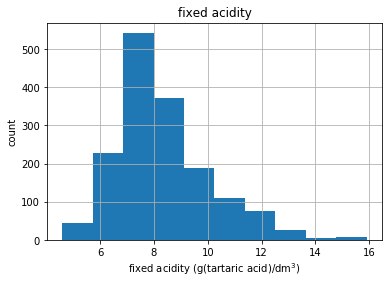

In [2]:
import matplotlib.pyplot as plt

df = pd.read_csv(URL1, sep=';')
print(df.head())

pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

#### read excel files from the web

In [3]:
URL2 = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

xl = pd.read_excel(URL2, sheet_name=None)

print(xl.keys())
print("="*10)
print(xl['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


#### HTTP requests via urllib library

In [4]:
from urllib.request import urlopen, Request

URL3 = "http://www.datacamp.com/teach/documentation"

request = Request(URL3) # pull in request
response = urlopen(request) # send request to catch response
print(type(response)) # response data type
response.close() # close response

<class 'http.client.HTTPResponse'>


#### print HTTP requests via urllib library

In [5]:
request = Request(URL3)
response = urlopen(request)
html = response.read()

print(html[:1000]) # print 1000 chars

response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="YYQbi/E5IQx1C0qG8b7nP/tACsM29cmDHH2al12yacs="></script>\n      <script nonce="YYQbi/E5IQx1C0qG8b7nP/tACsM29cmDHH2al12yacs=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;edu

#### HTTP requests via requests library

In [6]:
import requests

URL4 = "http://www.datacamp.com/teach/documentation"

r = requests.get(URL4) # send request and catch response
text = r.text # extract reponse

print(text[:1000]) # print 1000 chars

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="kiRDqvLQx6FQ8kx+LMb1s7hrLZ75MwyTOAHEEhUzfNQ="></script>
      <script nonce="kiRDqvLQx6FQ8kx+LMb1s7hrLZ75MwyTOAHEEhUzfNQ=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;educate_home&quot;,&quot;pl

#### HTML parsing via beautifulsoup library

In [7]:
import requests
from bs4 import BeautifulSoup

URL5 = 'https://www.python.org/~guido/'

r = requests.get(URL5)
html_doc = r.text
soup = BeautifulSoup(html_doc, "html.parser")
pretty_soup = soup.prettify() # scrape web

print(pretty_soup[:750])

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
   <h3>
    <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
     Who
I Am
    </a>
   </h3>
   <p>
    Read
my
    <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
     "King's
Day Speech"
    </a>
    for some inspiration.
    <p>
     I am the author of the
     <a href="http://


#### HTML text via beautifulsoup library

In [8]:
r = requests.get(URL5)
html_doc = r.text
soup = BeautifulSoup(html_doc, "html.parser")

guido_title = soup.title # get title from webpage
print(guido_title)

guido_text = soup.get_text() # get text from webpage
print(guido_text[:750])

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page
"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.  I
also have
a G+
profile.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to R


#### HTML hyperlinks via beautifulsoup library

In [9]:
r = requests.get(URL5)

html_doc = r.text
soup = BeautifulSoup(html_doc, "html.parser")
print(soup.title)
a_tags = soup.find_all('a') # get all hyperlinks => defined by HTML tag <a>

for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## _2. Interacting with APIs to Import Data from the Web:_
-  JSON:
    -  dictionary like key:value schema
    -  utilized for real-time server-to-browser API communication
-  APIs:
    -  pulling data
    -  parsing data
    -  allows two software programs to communicate with one another
    -  connecting API to python

#### loading json file

In [10]:
import json 
JSON = '/users/grp/Documents/BIGDATA/DATACAMP/6 - importingdatainpythonpart2/movie.json'

with open(JSON) as json_file:
    json_data = json.load(json_file)

for k in json_data.keys():
    print(k + ': ', json_data[k])

Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
BoxOffice:  $96,400,000
Country:  USA
DVD:  11 Jan 2011
Director:  David Fincher
Genre:  Biography, Drama
Language:  English, French
Metascore:  95
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Production:  Columbia Pictures
Rated:  PG-13
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Released:  01 Oct 2010
Response:  True
Runtime:  120 min
Title:  The Social Network
Type:  movie
Website:  http://www.thesocialnetwork-

#### API requests

In [11]:
import requests

URL6 = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'
r = requests.get(URL6)
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"559,522","imdbID":"tt

#### pull JSON from web to python

In [12]:
URL7 = 'http://www.omdbapi.com/?apikey=72bc447a&t=social+network'
r = requests.get(URL7)
json_data = r.json() # put json data into dictionary

for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  559,522
imdbID:  tt1285016
Type:  movie
DVD:

#### wikipedia API

In [13]:
URL8 = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

r = requests.get(URL8)
json_data = r.json()
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a  wood-fired oven. In formal settings, like a restaurant, pizza is  eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.   
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have since become popular in many countries. Today it is one of the most popular foods in the world and a common fast food item in Europe and North America, available at  pizzerias (restaurants specializing in pizza),  restaurants offering Me

## _3. Diving Deep into the Twitter API_:
-  stream data via twitter api
-  filter keywords
-  api authentication and oauth
-  tweepy python package

#### API authentication

In [14]:
'''
import tweepy

# store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
'''

'\nimport tweepy\n\n# store OAuth authentication credentials in relevant variables\naccess_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"\naccess_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"\nconsumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"\nconsumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"\n\n# pass OAuth details to tweepy\'s OAuth handler\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_token_secret)\n'

#### tweets listener class

In [15]:
'''
TWITTER = '/users/grp/Documents/BIGDATA/DATACAMP/6 - importingdatainpythonpart2/tweets.txt'

class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open(TWITTER, "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)
'''

'\nTWITTER = \'/users/grp/Documents/BIGDATA/DATACAMP/6 - importingdatainpythonpart2/tweets.txt\'\n\nclass MyStreamListener(tweepy.StreamListener):\n    def __init__(self, api=None):\n        super(MyStreamListener, self).__init__()\n        self.num_tweets = 0\n        self.file = open(TWITTER, "w")\n\n    def on_status(self, status):\n        tweet = status._json\n        self.file.write( json.dumps(tweet) + \'\n\' )\n        self.num_tweets += 1\n        if self.num_tweets < 100:\n            return True\n        else:\n            return False\n        self.file.close()\n\n    def on_error(self, status):\n        print(status)\n'

#### stream tweets

In [16]:
'''
l = MyStreamListener() # initialize class listener stream
stream = tweepy.Stream(auth, l) # create stream object with auth
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz']) # filter keywords
'''

"\nl = MyStreamListener() # initialize class listener stream\nstream = tweepy.Stream(auth, l) # create stream object with auth\nstream.filter(track=['clinton', 'trump', 'sanders', 'cruz']) # filter keywords\n"

#### explore twitter data

In [38]:
import json

TWITTER = '/users/grp/Documents/BIGDATA/DATACAMP/6 - importingdatainpythonpart2/tweets3.txt'

tweets_data_path = TWITTER

tweets_data = [] # empty list to store tweets
tweets_file = open(tweets_data_path, "r") # opens connection to file

for line in tweets_file: # read in tweets and store in list
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close() # close connection to file
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


#### transform twitter data to dataframe

In [39]:
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])
df.head()

,text,lang
0,RT @bpolitics: .@krollbondrating's Christopher...,en
1,RT @HeidiAlpine: @dmartosko Cruz video found.....,en
2,Njihuni me Zonjën Trump !!! | Ekskluzive https...,et
3,Your an idiot she shouldn't have tried to grab...,en
4,RT @AlanLohner: The anti-American D.C. elites ...,en


#### text analysis

In [43]:
import re

def word_in_text(word, tweet):
    word = word.lower()
    tweet = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

In [44]:
[clinton, trump, sanders, cruz] = [0, 0, 0, 0] # list to store tweet counts

# count the number of tweets per candidate
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

#### visualize twitter data

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


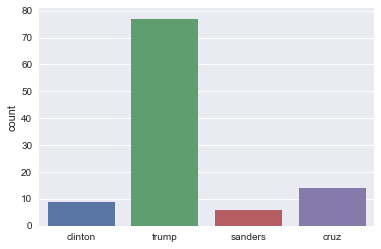

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

cd = ['clinton', 'trump', 'sanders', 'cruz']

ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

### grp